In [1]:
## Import 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [70]:
## Read data 
iphone = pd.read_csv("D:/iphone_purchase_records.csv")

In [71]:
## Copy main data
df1=iphone.copy()
df1.head(2)

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0


In [6]:
df1.shape

(400, 4)

In [7]:
df1.isnull().sum()

Gender             0
Age                0
Salary             0
Purchase Iphone    0
dtype: int64

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   Salary           400 non-null    int64 
 3   Purchase Iphone  400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [9]:
df1.describe(include='all')

,Gender,Age,Salary,Purchase Iphone
count,400,400.000000,400.000000,400.000000
unique,2,NaN,NaN,NaN
top,Female,NaN,NaN,NaN
freq,204,NaN,NaN,NaN
mean,NaN,37.655000,69742.500000,0.357500
std,NaN,10.482877,34096.960282,0.479864
min,NaN,18.000000,15000.000000,0.000000
25%,NaN,29.750000,43000.000000,0.000000
50%,NaN,37.000000,70000.000000,0.000000
75%,NaN,46.000000,88000.000000,1.000000


*EDA 

In [11]:
i_male = len(df1[(df1['Gender']=='Male') & (df1['Purchase Iphone']==1)])
print('Number of male has iphone ', i_male)

Number of male has iphone  66


In [12]:
i_female = len(df1[(df1['Gender']=='Female') & (df1['Purchase Iphone']==1)])
print('Number of female has iphone ', i_female)

Number of female has iphone  77


<Axes: xlabel='Gender'>

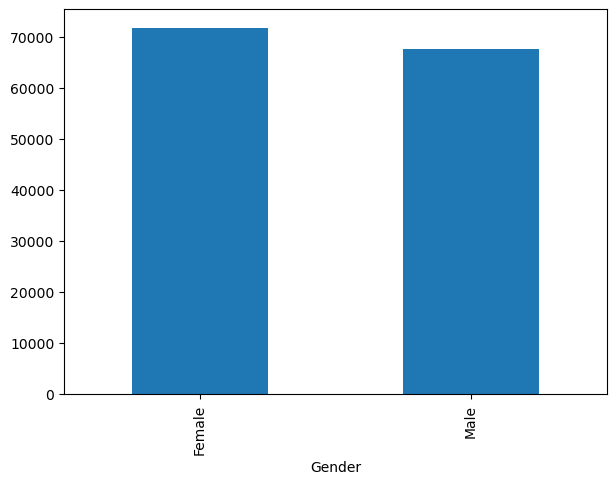

In [15]:
plt.figure(figsize = (7,5))
df1.groupby('Gender')['Salary'].mean().plot(kind='bar')

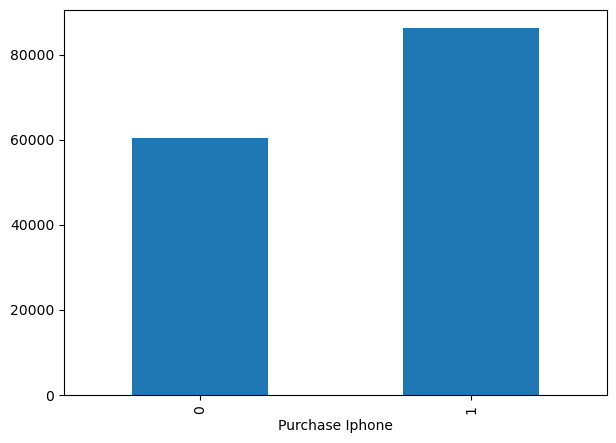

In [16]:
plt.figure(figsize = (7,5))
df1.groupby('Purchase Iphone')['Salary'].mean().plot(kind='bar')
plt.show()

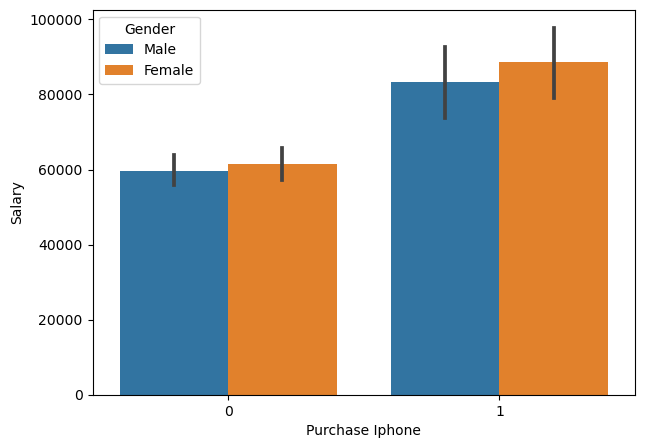

In [18]:
plt.figure(figsize = (7,5))
sns.barplot(x='Purchase Iphone', y = 'Salary', hue='Gender', data =df1)
plt.show()

C:\Users\ACER\anaconda3\py\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 700x500 with 0 Axes>

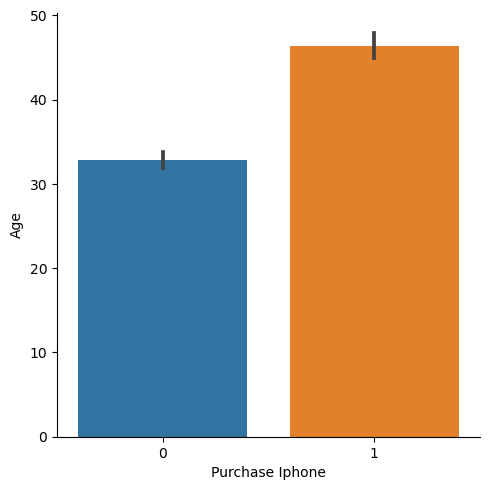

In [19]:
plt.figure(figsize = (7,5))
sns.catplot(x='Purchase Iphone', y='Age', data = df1, kind ='bar')
plt.show()

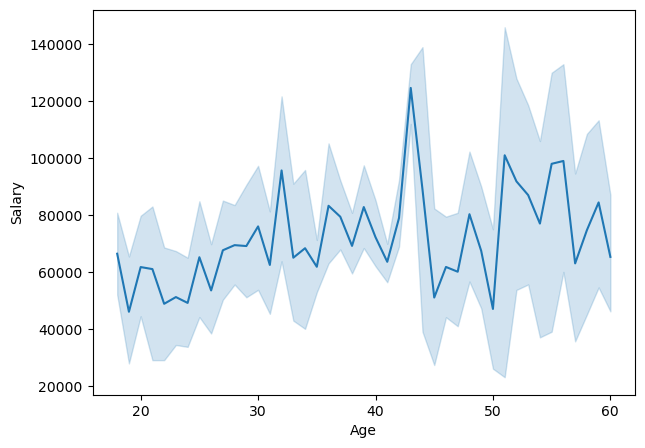

In [21]:
plt.figure(figsize = (7,5))
sns.lineplot(x='Age', y ='Salary', data = df1)
plt.show()

In [44]:

df1['Age'] = pd.to_numeric(df1['Age'], errors='coerce')
df1['Salary'] = pd.to_numeric(df1['Salary'], errors='coerce')

In [45]:
## Correlation 
corr = df1.corr()
print (corr)

                      Age    Salary  Purchase Iphone
Age              1.000000  0.155238         0.622454
Salary           0.155238  1.000000         0.362083
Purchase Iphone  0.622454  0.362083         1.000000


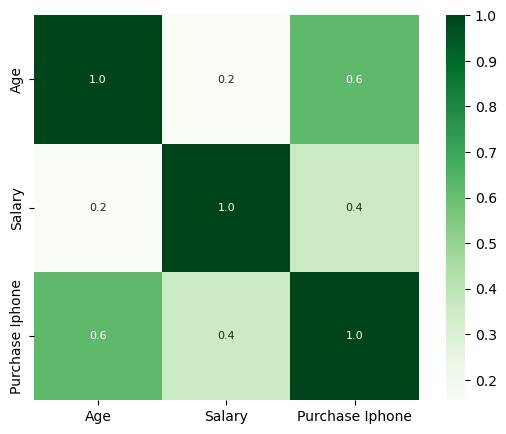

In [52]:

plt.figure(figsize=(7, 5))
sns.heatmap(corr, annot=True, cbar=True, square=True, annot_kws={'size': 8}, fmt='.1f', cmap='Greens')
plt.show()


* model training 

In [74]:
df1['Gender'] = df1['Gender'].replace({'Male':1, 'Female':0})

In [78]:
X = df1[['Gender', 'Age', 'Salary']]
X


0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchase Iphone, Length: 400, dtype: int64

In [79]:
y = df1['Purchase Iphone']
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchase Iphone, Length: 400, dtype: int64

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=126)

In [80]:
def ds_tree(X_train,y_train,X_test):
    model_clf = DecisionTreeClassifier(criterion='entropy',max_depth =2)
    train_model = model_clf.fit(X_train,y_train)
    prediction = train_model.predict(X_test)
    return prediction

In [81]:
prediction = ds_tree(X_train,y_train,X_test)
prediction

array([0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0], dtype=int64)

In [82]:
model_accuracy =  accuracy_score(prediction,y_test)
print('Model accuracy score =', model_accuracy)

Model accuracy score = 0.91
